In [1]:
!git clone https://github.com/Murad-Ganbarli/Quantum-Applied-Reinforcement-Learning-in-Finance

fatal: destination path 'Quantum-Applied-Reinforcement-Learning-in-Finance' already exists and is not an empty directory.


In [2]:
# import yfinance as yf
# import pandas as pd

# # Define the time periods to fetch data in smaller chunks
# start_date = "2019-01-01"
# end_date = "2024-04-28"
# chunk_size = 1024  # Number of days per chunk

# # Initialize an empty DataFrame to store the fetched data
# concatenated_data = pd.DataFrame()

# # Fetch data in smaller chunks and concatenate them
# for i in range(0, 2048, chunk_size):
#     chunk_start = pd.Timestamp(start_date) + pd.Timedelta(days=i)
#     chunk_end = min(pd.Timestamp(end_date), chunk_start + pd.Timedelta(days=chunk_size - 1))
#     chunk_data = yf.download("MES=F", start=chunk_start, end=chunk_end, interval="1d")
#     concatenated_data = pd.concat([concatenated_data, chunk_data])

# # Select the last 1024 rows
# last_1024_days_data = concatenated_data.tail(1024)
# print(last_1024_days_data.head)
# # Save the data to a CSV file
# last_1024_days_data.to_csv("source.csv")

In [3]:
#!pip install numpy==1.21.2

In [4]:

# prompt: go to /content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/ + folder + /source.csv for folders and delete all columns except OPEN,CLOSE,HIGH,LOW,VOLUME. save to file itself, dont create new one
import os
import pandas as pd

# Change directory to the data folder
%cd /content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/

Products = []
# Iterate through all folders
for folder in os.listdir():
  Products.append(folder)

  # Change directory to the current folder
  %cd {folder}

  # Read the source.csv file
  df = pd.read_csv('source.csv')


  df.columns = map(str.upper, df.columns)

  if "New" in folder:
    df = df.rename(columns={"VOLUMN": "VOLUME"})

  print(df.columns)
  # Drop all columns except OPEN, CLOSE, HIGH, LOW, VOLUME
  df = df[  ['OPEN','CLOSE','HIGH','LOW','VOLUME'] ]

  # Save the changes to the source.csv file
  df.to_csv('source.csv', index=False,  float_format='%.17f')

  # Change directory back to the parent folder
  %cd ..

/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data
/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/New D_AUDUSD
Index(['OPEN', 'CLOSE', 'HIGH', 'LOW', 'VOLUME', 'RETURN', 'QPL', 'QPL+',
       'QPL-', 'MA5', 'MA21', 'RSI'],
      dtype='object')
/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data
/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/New D_NZDUSD
Index(['OPEN', 'CLOSE', 'HIGH', 'LOW', 'VOLUME', 'RETURN', 'QPL', 'QPL+',
       'QPL-', 'MA5', 'MA21', 'RSI'],
      dtype='object')
/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data
/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/New AUDUSD
Index(['OPEN', 'CLOSE', 'HIGH', 'LOW', 'VOLUME', 'RETURN', 'QPL', 'QPL+',
       'QPL-', 'MA5', 'MA21', 'RSI'],
      dtype='object')
/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data
/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/New D_EURCAD
Index(['OPEN', 'CLOSE', 'HIGH', 'LOW

In [5]:
# !pip install ta

In [6]:
# prompt: function to calculate  with a default nan_handler = True , if True , handle the windowing whne there is not enough rows before current row . function will only have 2 input: df and nan_handler = True   # Calculate MA5 and MA21
#     new_df['MA5'] = new_df['CLOSE'].rolling(window=5).mean()
#     new_df['MA21'] = new_df['CLOSE'].rolling(window=21).mean()

def calculate_moving_averages(df, nan_handler=True):
  """
  Calculates the moving averages for a given DataFrame.

  Args:
      df: The DataFrame containing the data.
      nan_handler: If True, handles the windowing when there are not enough rows before the current row.

  Returns:
      The DataFrame with the calculated moving averages.
  """

  new_df = df.copy()
  new_df['MA5'] = new_df['CLOSE'].rolling(window=5, min_periods=1 if nan_handler else 5).mean()
  new_df['MA21'] = new_df['CLOSE'].rolling(window=21, min_periods=1 if nan_handler else 21).mean()
  return new_df

In [7]:
import pandas as pd
import numpy as np
import cmath
from scipy.optimize import fsolve

def calculate_K_values(p3):
    K_values = [pow((1.1924 + 33.2383*eL + 56.2169*eL*eL)/(1 + 43.6106 *eL),p3) for eL in range(21)]
    return K_values

def calculate_daily_price_return(df):
    df['Return'] = df['CLOSE'].pct_change()
    return df

def solve_cubic_cardano(a, b, c, d):
    # calculate intermediate values
    p = (3*a*c - b*2) / (3*a*2)
    q = (2*b*3 - 9*a*b*c + 27*a**2*d) / (27*a*3)
    delta = (q*2 / 4 + p*3 / 27)

    # determine number and type of roots
    if delta > 0:  # one real and two complex roots
        u = (-q/2 + cmath.sqrt(delta))**(1/3)
        v = (-q/2 - cmath.sqrt(delta))**(1/3)
        x1 = u + v - b / (3*a)
        x2 = -(u + v)/2 - b / (3*a) + (u - v)*cmath.sqrt(3)/2j
        x3 = -(u + v)/2 - b / (3*a) - (u - v)*cmath.sqrt(3)/2j
        return [x1]
    elif delta == 0:  # three real roots, two are equal
        u = (-q/2)**(1/3)
        v = u
        x1 = 2*u - b / (3*a)
        x2 = -u - b / (3*a)

        return [x1.real, x2.real, x3.real]
    else:  # three distinct real roots
        u = (-q/2 + cmath.sqrt(delta))**(1/3)
        v = (-q/2 - cmath.sqrt(delta))**(1/3)
        x1 = u + v - b / (3*a)
        x2 = -(u + v)/2 - b / (3*a) + (u - v)*cmath.sqrt(3)/2j
        x3 = -(u + v)/2 - b / (3*a) - (u - v)*cmath.sqrt(3)/2j

        return [x1.real, x2.real, x3.real]

def solve_quantum_cubic_eqn_cardano(K, n):
    a = 1/ ((2*n+1)**3)
    b = 0
    c = - 1/ (2*n+1)
    d = -K**3

    # Solve the transformed equation using the solve_cubic_cardano function
    roots = solve_cubic_cardano(a, b, c, d)

    return roots[0]

def calculate_QFELs(K_values):
    QFELs = [solve_quantum_cubic_eqn_cardano(K_values[n], n) for n in range(21)]
    return QFELs

def calculate_QPRs_NQPRs(QFELs, sigma):
    QPRs = [QFEL/QFELs[0] for QFEL in QFELs]
    NQPRs = [1 + 0.21*sigma*QPR for QPR in QPRs]
    return QPRs, NQPRs

def calculate_QPLs(df, NQPRs):
    df['QPL'] = df['OPEN'] * NQPRs[0]
    df['QPL+'] = df['OPEN'] * NQPRs[1]
    df['QPL-'] = df['OPEN'] / NQPRs[1]
    return df

def process_csv_file(file_name, p3):
    df = pd.read_csv(file_name)
    df = calculate_daily_price_return(df)
    K_values = calculate_K_values(p3)
    sigma = df['Return'].std()
    QFELs = calculate_QFELs(K_values)
    QPRs, NQPRs = calculate_QPRs_NQPRs(QFELs, sigma)
    df = calculate_QPLs(df, NQPRs)
    return df

def calculate_RSI(df, period=14):
    delta = df['CLOSE'].diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    average_gain = up.rolling(window=period).mean()
    average_loss = abs(down.rolling(window=period).mean())

    RS = average_gain / average_loss
    RSI = 100.0 - (100.0 / (1.0 + RS))

    df['RSI'] = RSI
    return df

In [8]:
Products

['New D_AUDUSD',
 'New D_NZDUSD',
 'New AUDUSD',
 'New D_EURCAD',
 'New D_EURUSD',
 'BOEING',
 'New D_EURAUD',
 'New D_GBPUSD',
 'TESLA',
 'AUDUSD',
 'New D_USDCHF',
 'XAUUSD',
 'GOOGLE',
 'AIRBUS',
 'M E-mini S&P 500',
 'New D_AUDCAD',
 'SILVER',
 'New D_NZDCHF',
 'USD100M1',
 'META',
 'APPLE']

In [9]:
for product in Products:
    file_name = '/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/'+product+'/source.csv'
    p3 = 1/3
    print(file_name)
    df = process_csv_file(file_name, p3)
    df.to_csv(file_name, index=False, float_format='%.17f')


    df =  calculate_moving_averages(df)
    df.to_csv(file_name, index=False, float_format='%.17f')

    df = calculate_RSI(df, period=14)
    df.to_csv(file_name, index=False, float_format='%.17f')

/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/New D_AUDUSD/source.csv
/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/New D_NZDUSD/source.csv
/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/New AUDUSD/source.csv
/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/New D_EURCAD/source.csv
/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/New D_EURUSD/source.csv
/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/BOEING/source.csv
/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/New D_EURAUD/source.csv
/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/New D_GBPUSD/source.csv
/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/TESLA/source.csv
/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/AUDUSD/source.csv
/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/New D_USDCHF/source.csv
/content/Quantum-Applied-Reinforcement-Learning-in-Fi

In [10]:
%cd /content/Quantum-Applied-Reinforcement-Learning-in-Finance

from environment import Environment
from agent import Agent
from standardization import Preprocessor
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil
from plot_kline_transaction import draw_transaction
from financial_tools import MaxDrawdown, SharpeRatio
import seaborn as sns

import torch

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # Use the first GPU
else:
    device = torch.device("cpu")
print(device)
sns.set_style("white")


GAMMAs = [0.3,0.5,0.7,0.9,0.5]
GAMMAs += [0.5] * (len(Products) - len(GAMMAs))

BATCH_SIZEs = [128,64,64,128,64]
BATCH_SIZEs +=[128] * (len(Products) - len(BATCH_SIZEs))

LRs = [0.001 for _ in Products]


N_ACTIONS = 3

EPSILON = 0.9 #Probability of random walking
EPS_END = 5e-2 #Min of EPSILON

NGAMES = 1 #Epochs

fc1_dims = 400
fc2_dims = 200
fc3_dims = 100

Products = ['GOOGLE', "XAUUSD", "M E-mini S&P 500" , "BOEING", "AUDUSD"]

# Used Features
base = ['OPEN','CLOSE','HIGH','LOW','VOLUME','QPL','QPL+','QPL-','MA5','MA21','RSI']

# create an empty dictionary to store result for each product
dic = {}
for product in Products:
    dic[product] = []

/content/Quantum-Applied-Reinforcement-Learning-in-Finance
cpu


-------Training Model for GOOGLE --------
episode 0 : profits 3101110.00 MSE loss 1103.45
-------Training Model for XAUUSD --------
episode 0 : profits -324975.61 MSE loss 811.39
-------Training Model for M E-mini S&P 500 --------
episode 0 : profits -1377382.04 MSE loss 1390.55
-------Training Model for BOEING --------
episode 0 : profits 9055.56 MSE loss 1204.83
-------Training Model for AUDUSD --------
episode 0 : profits -728638.23 MSE loss 666.08


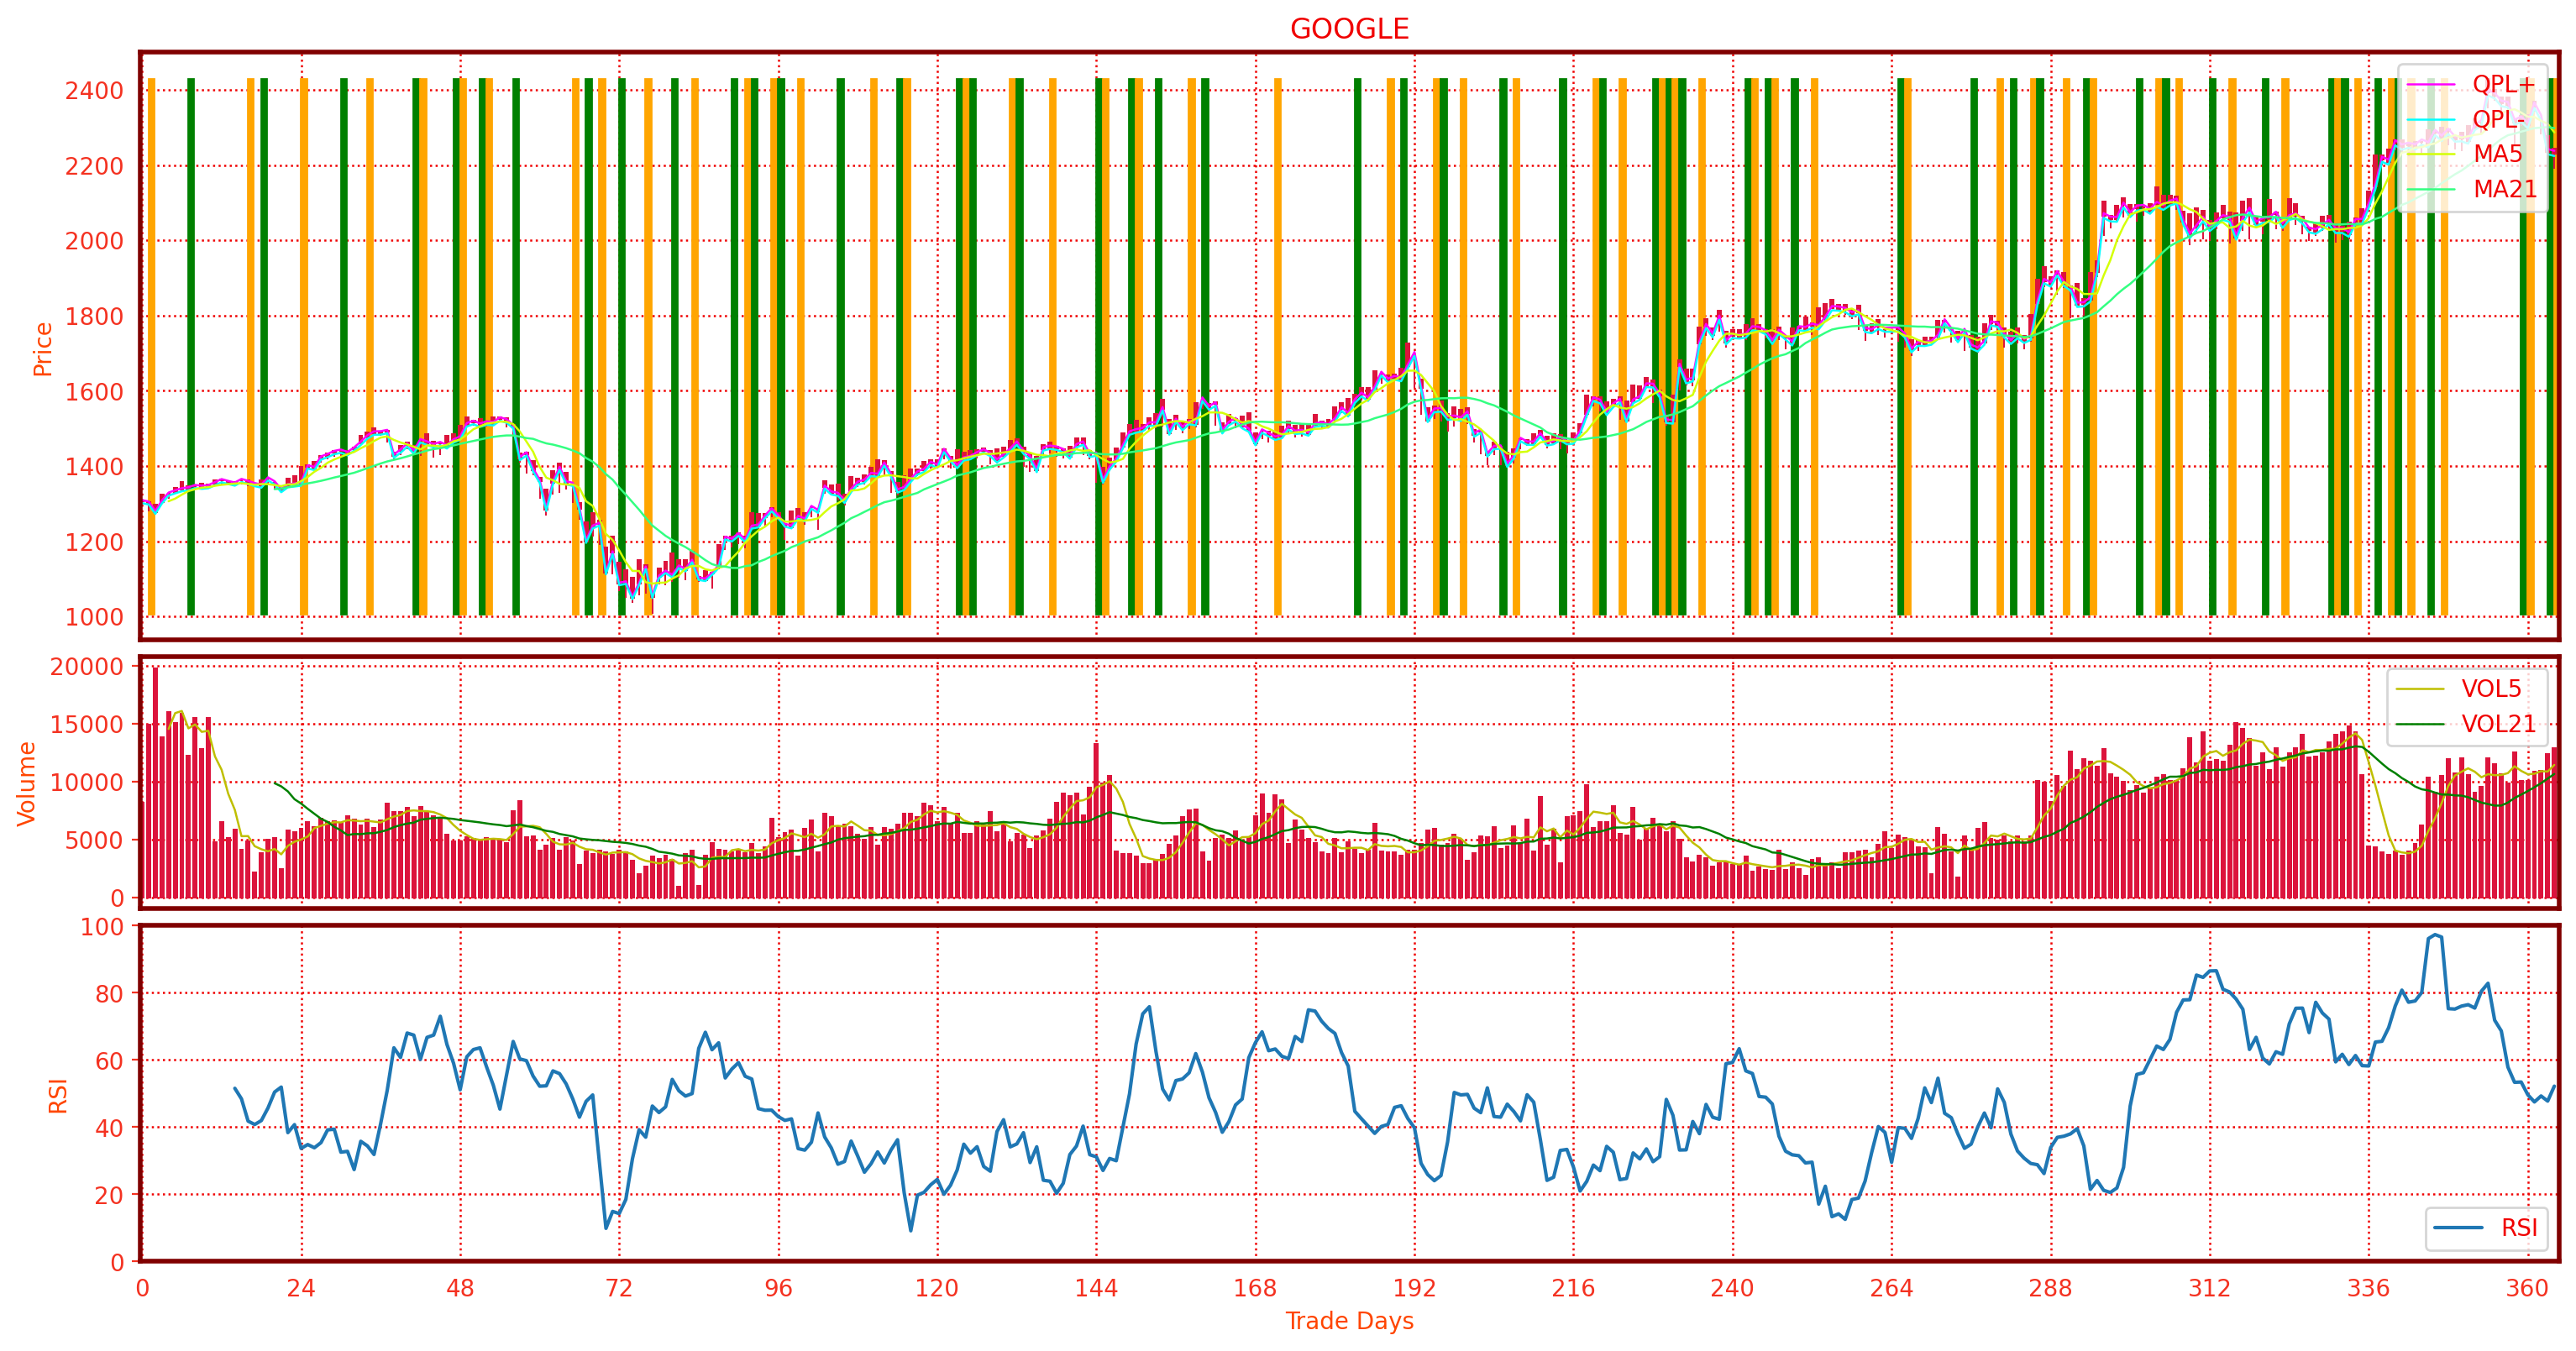

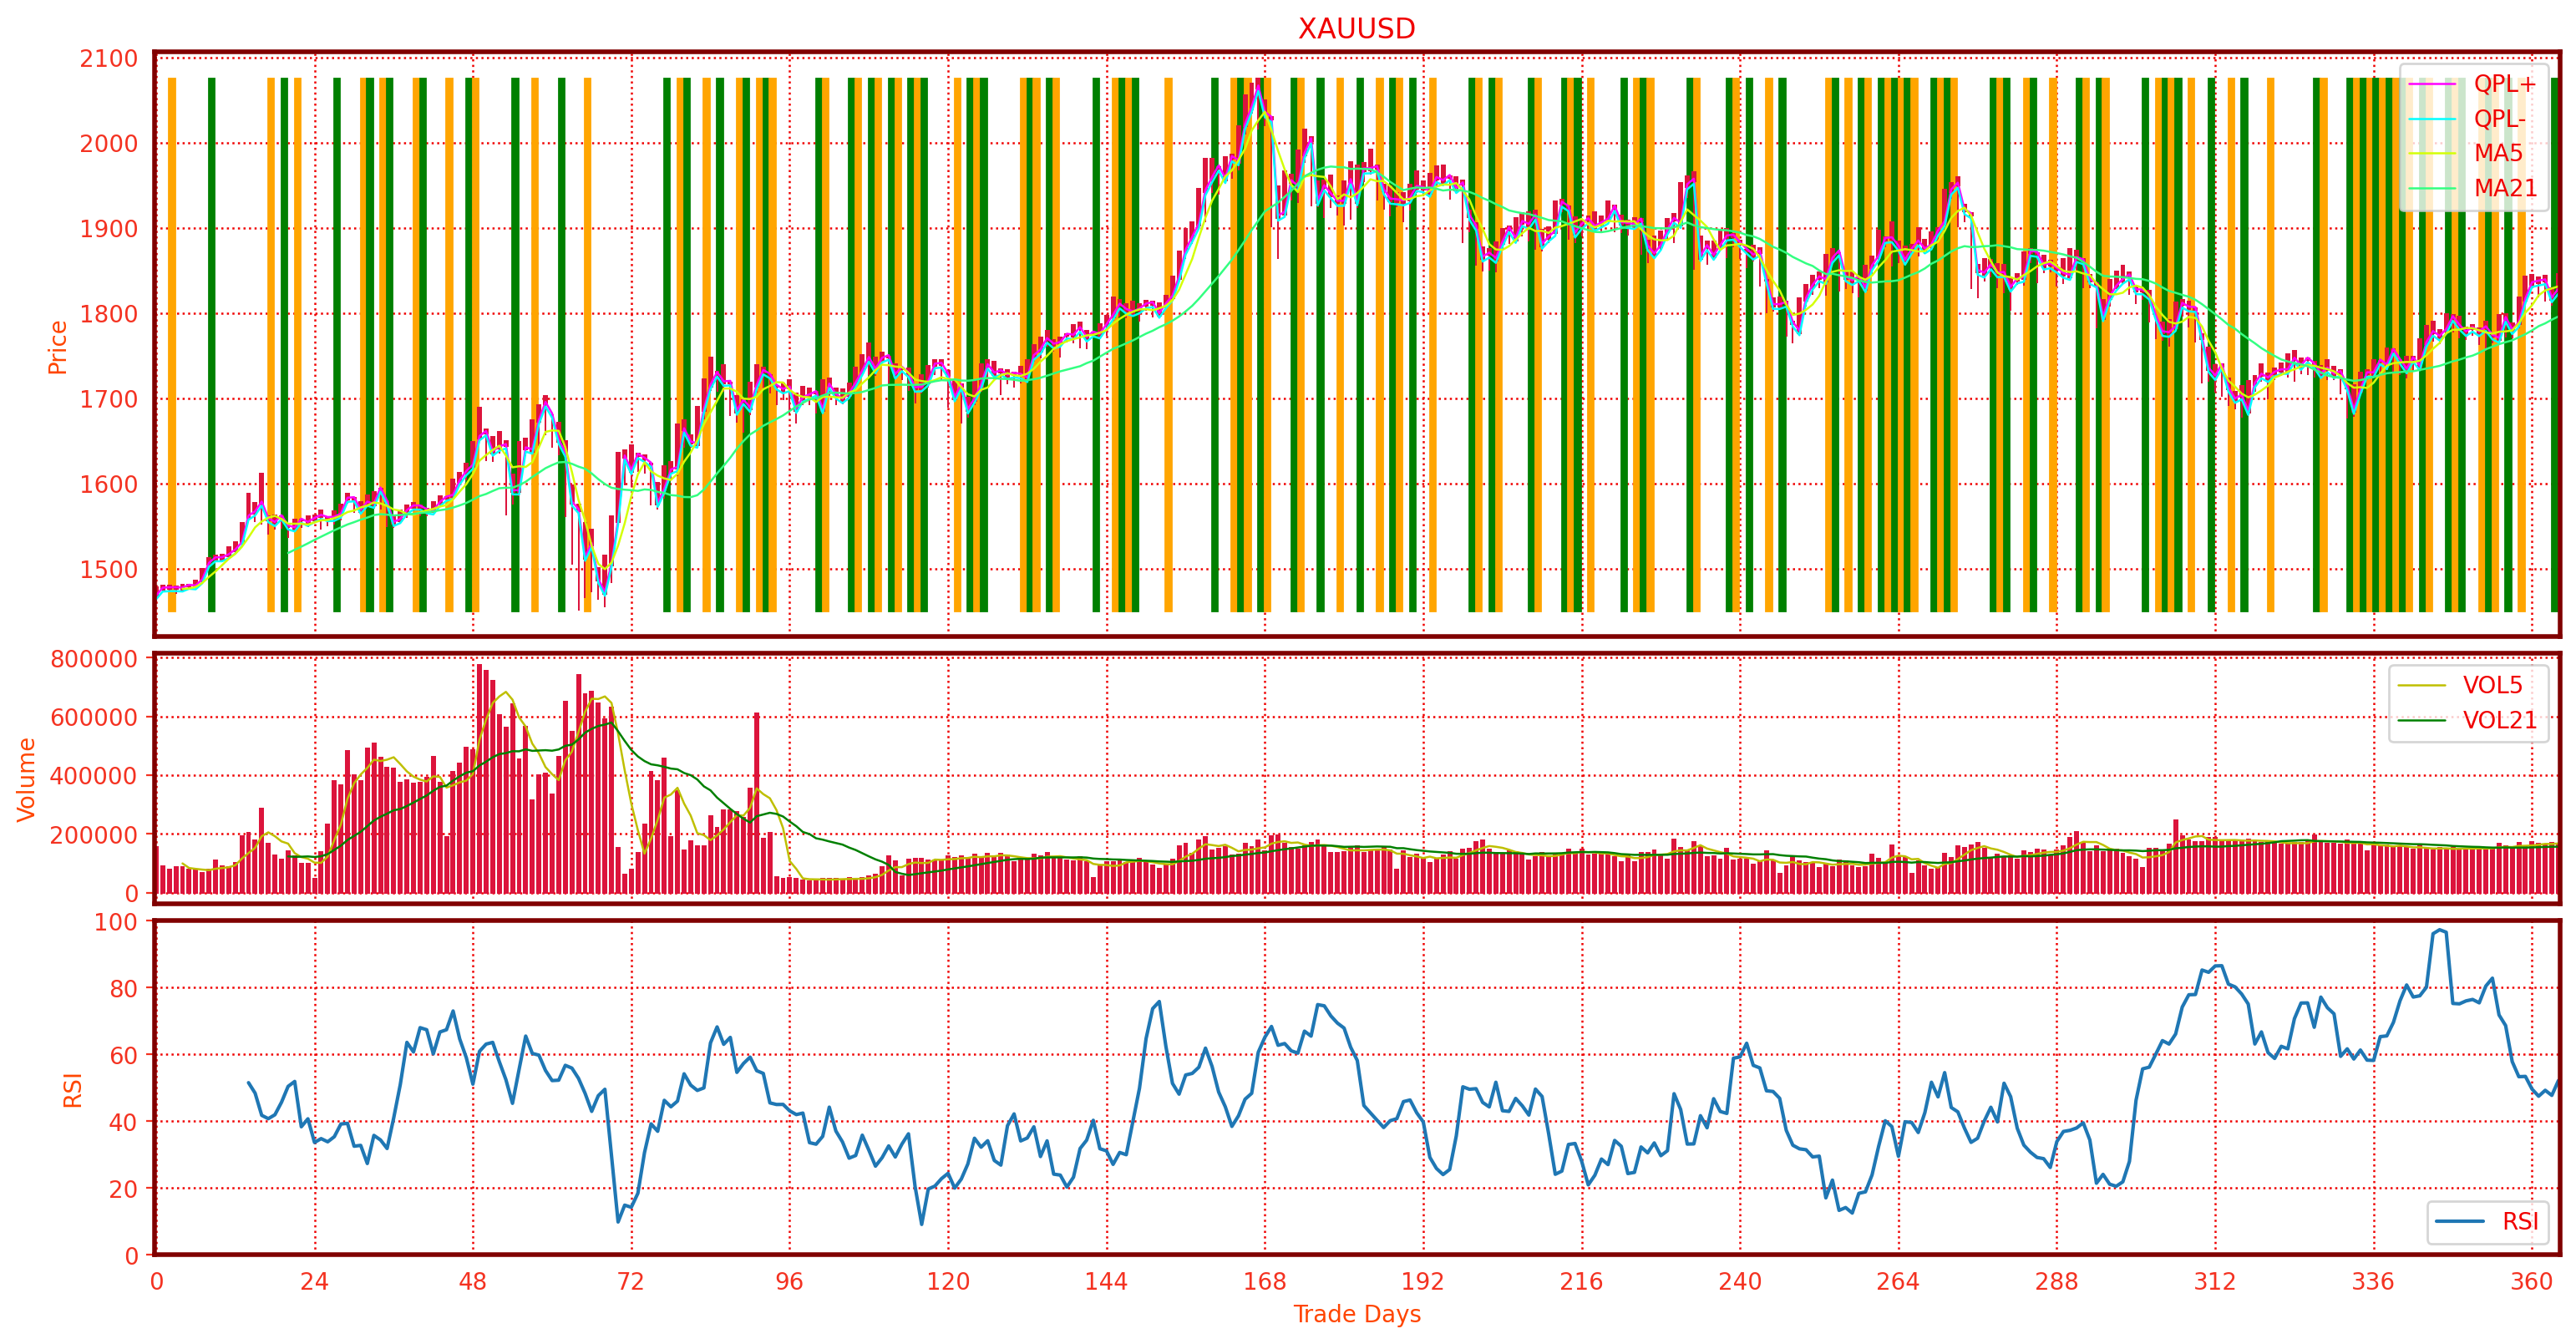

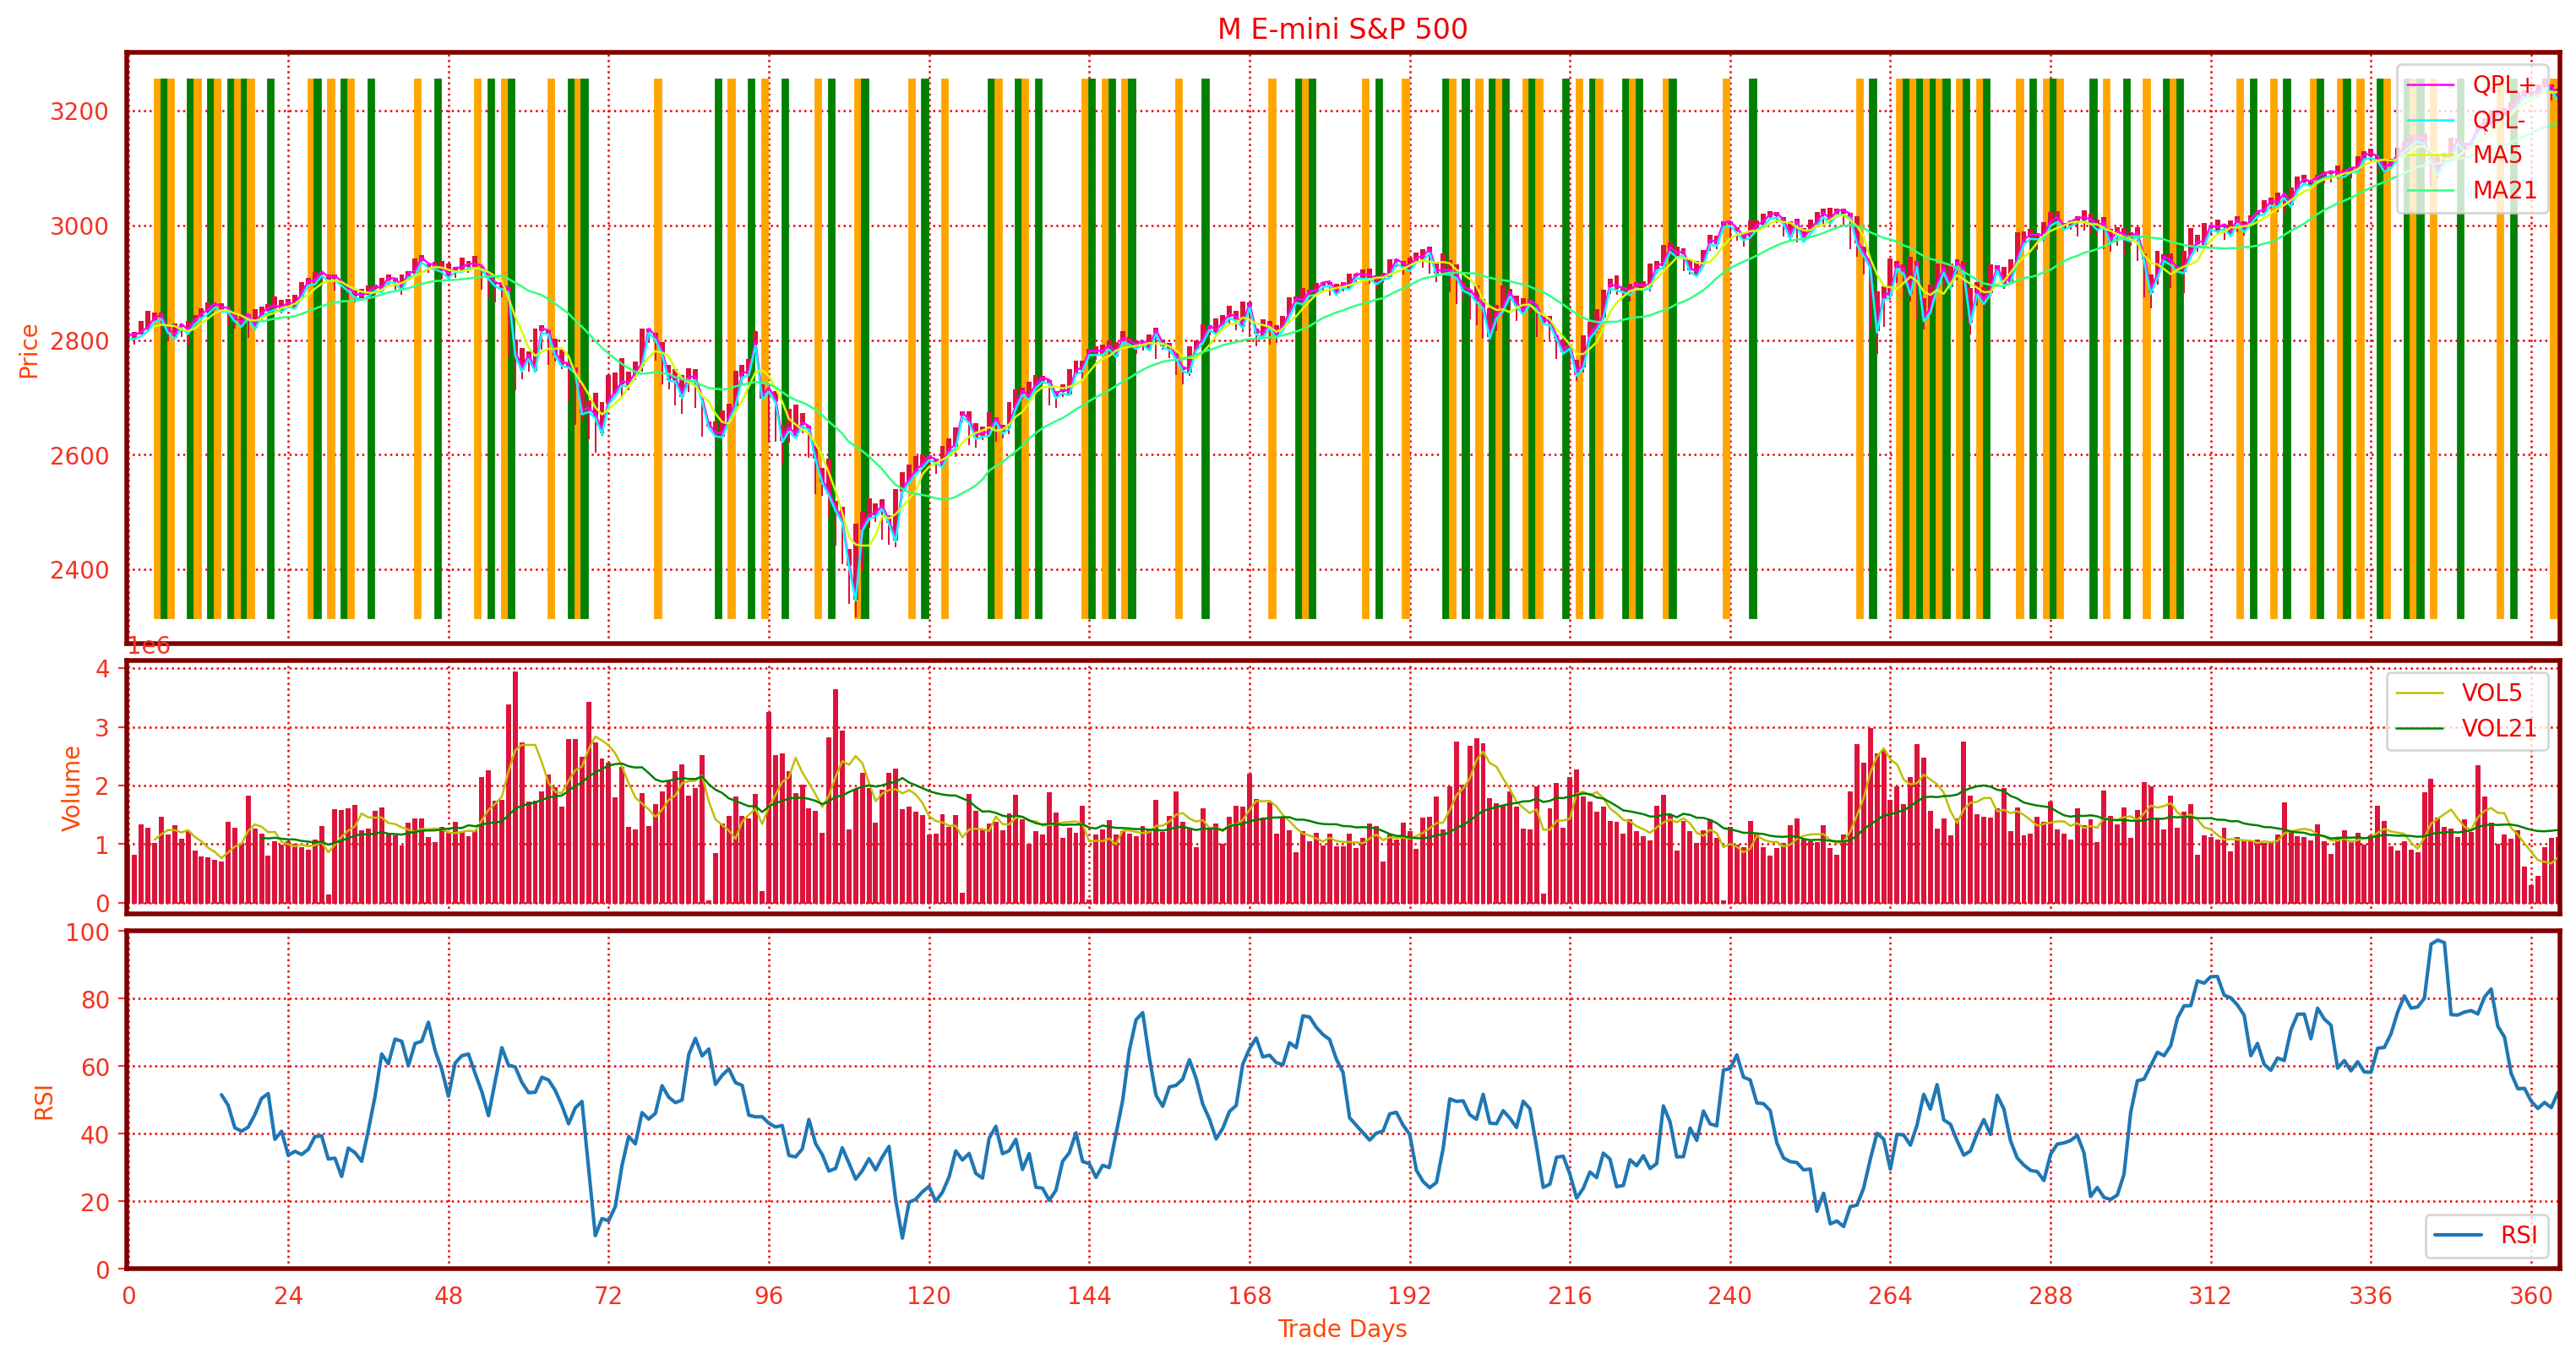

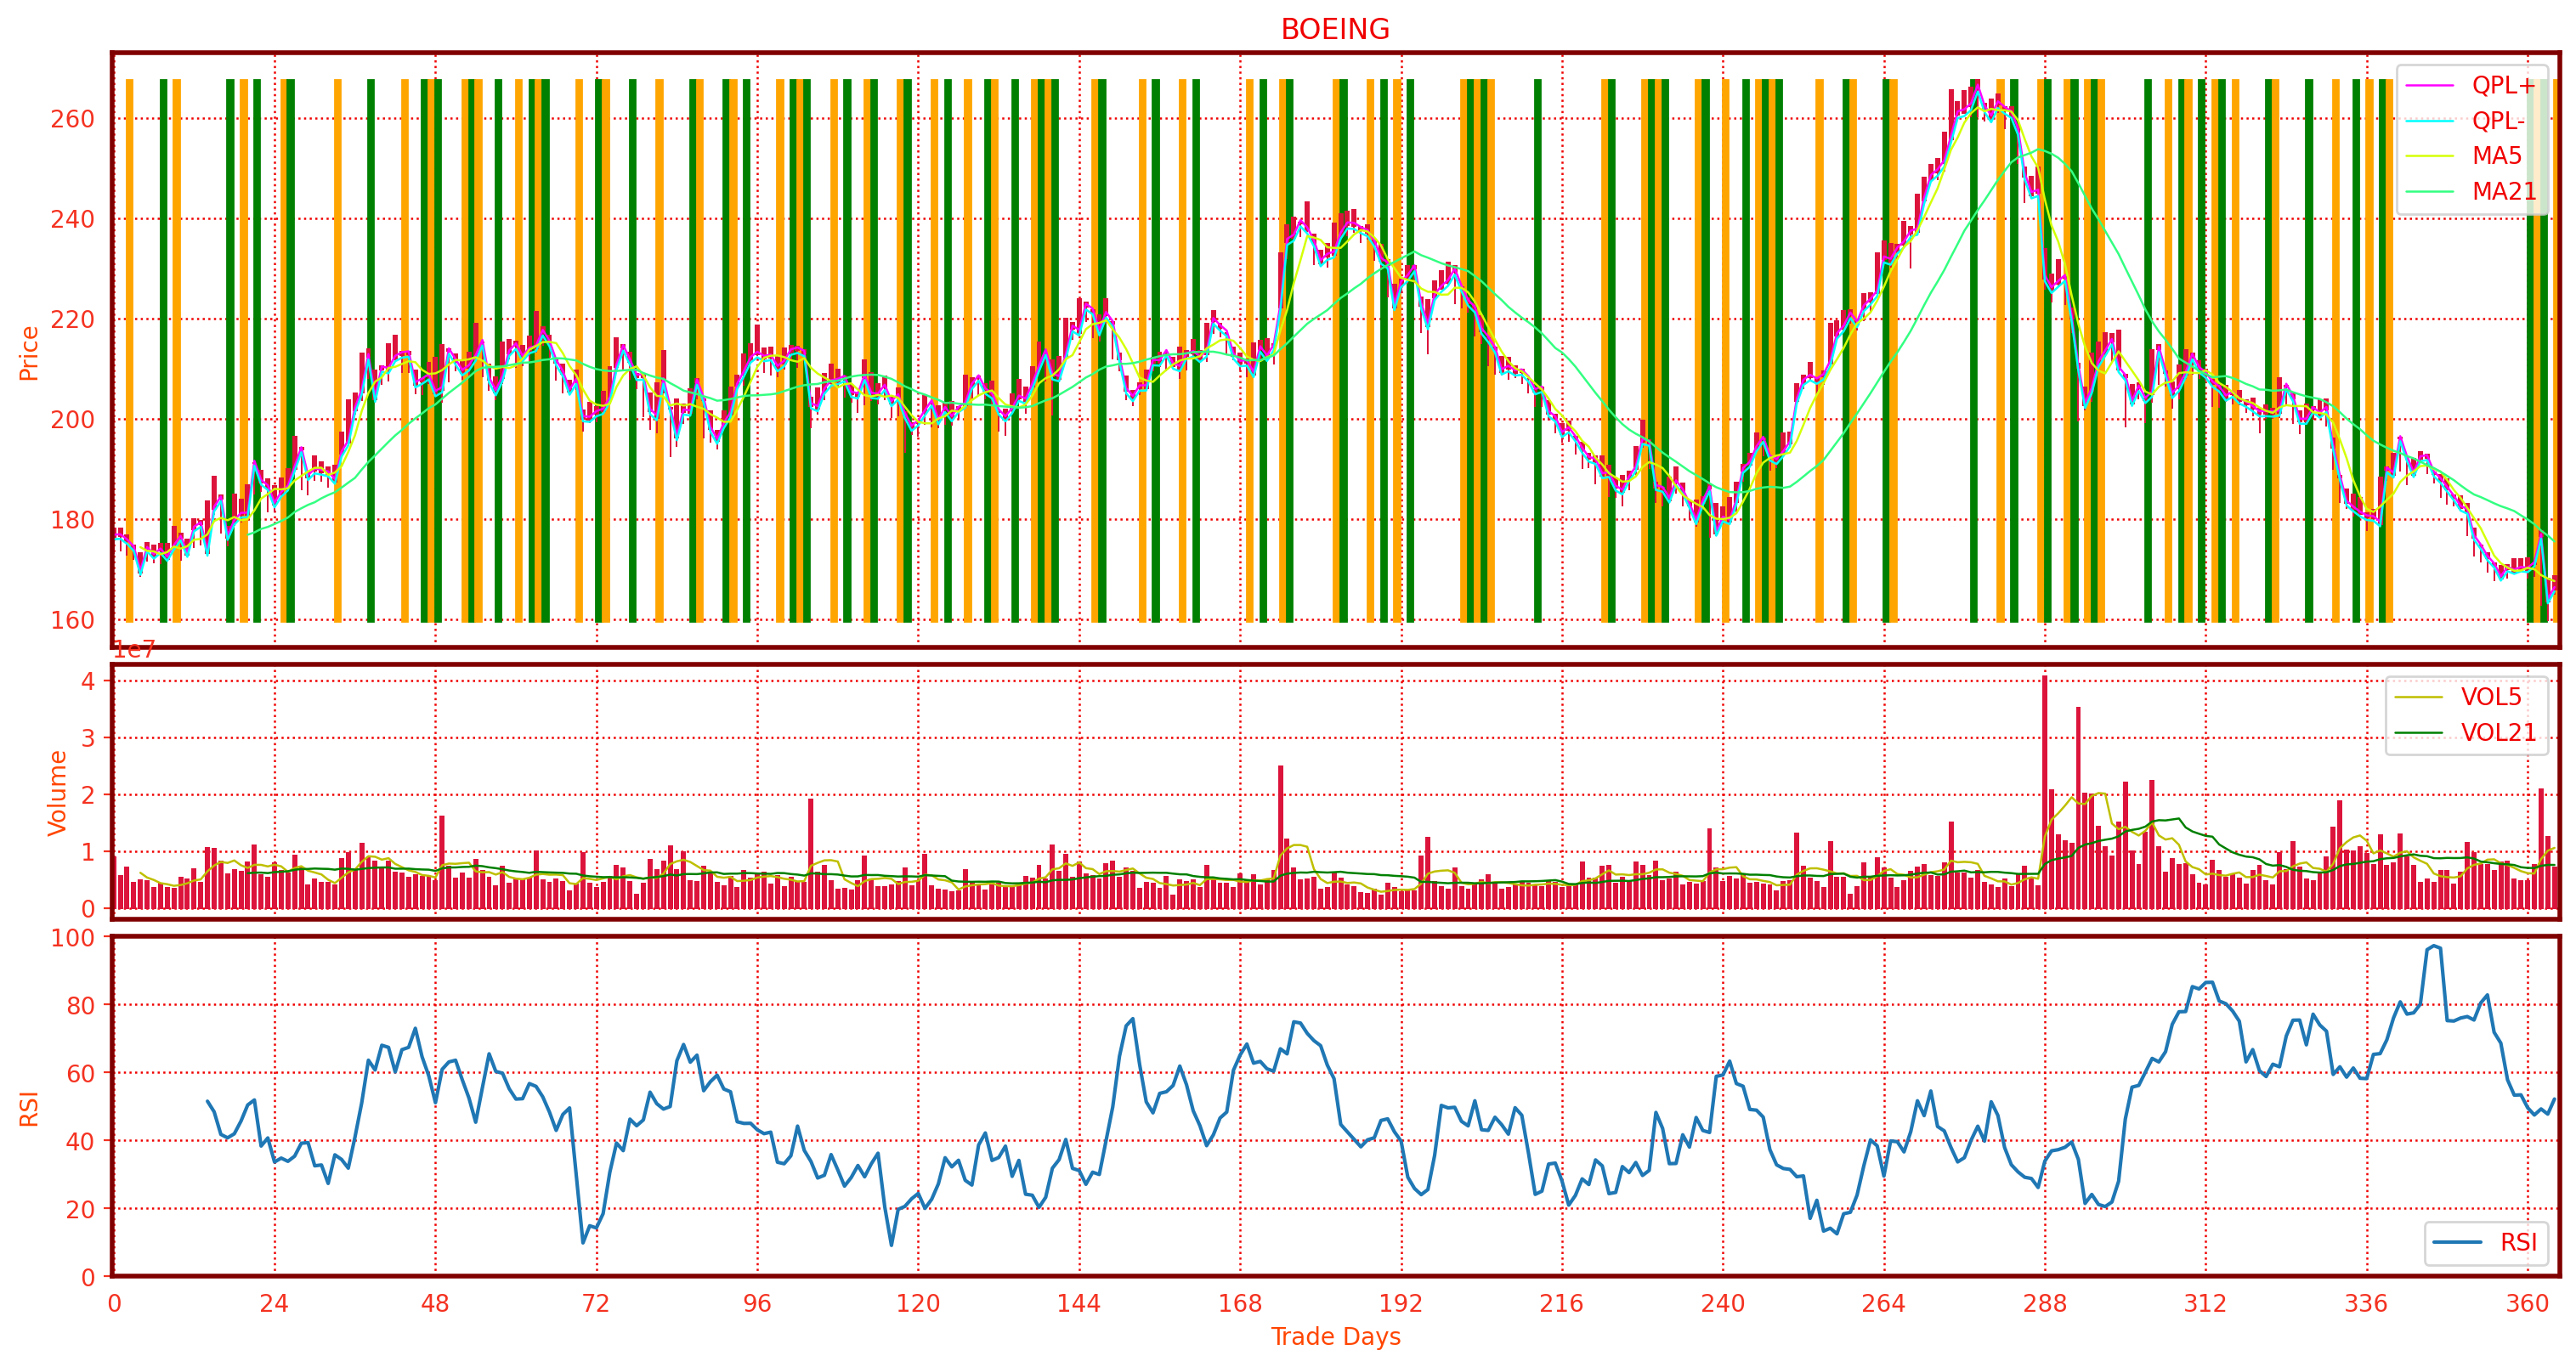

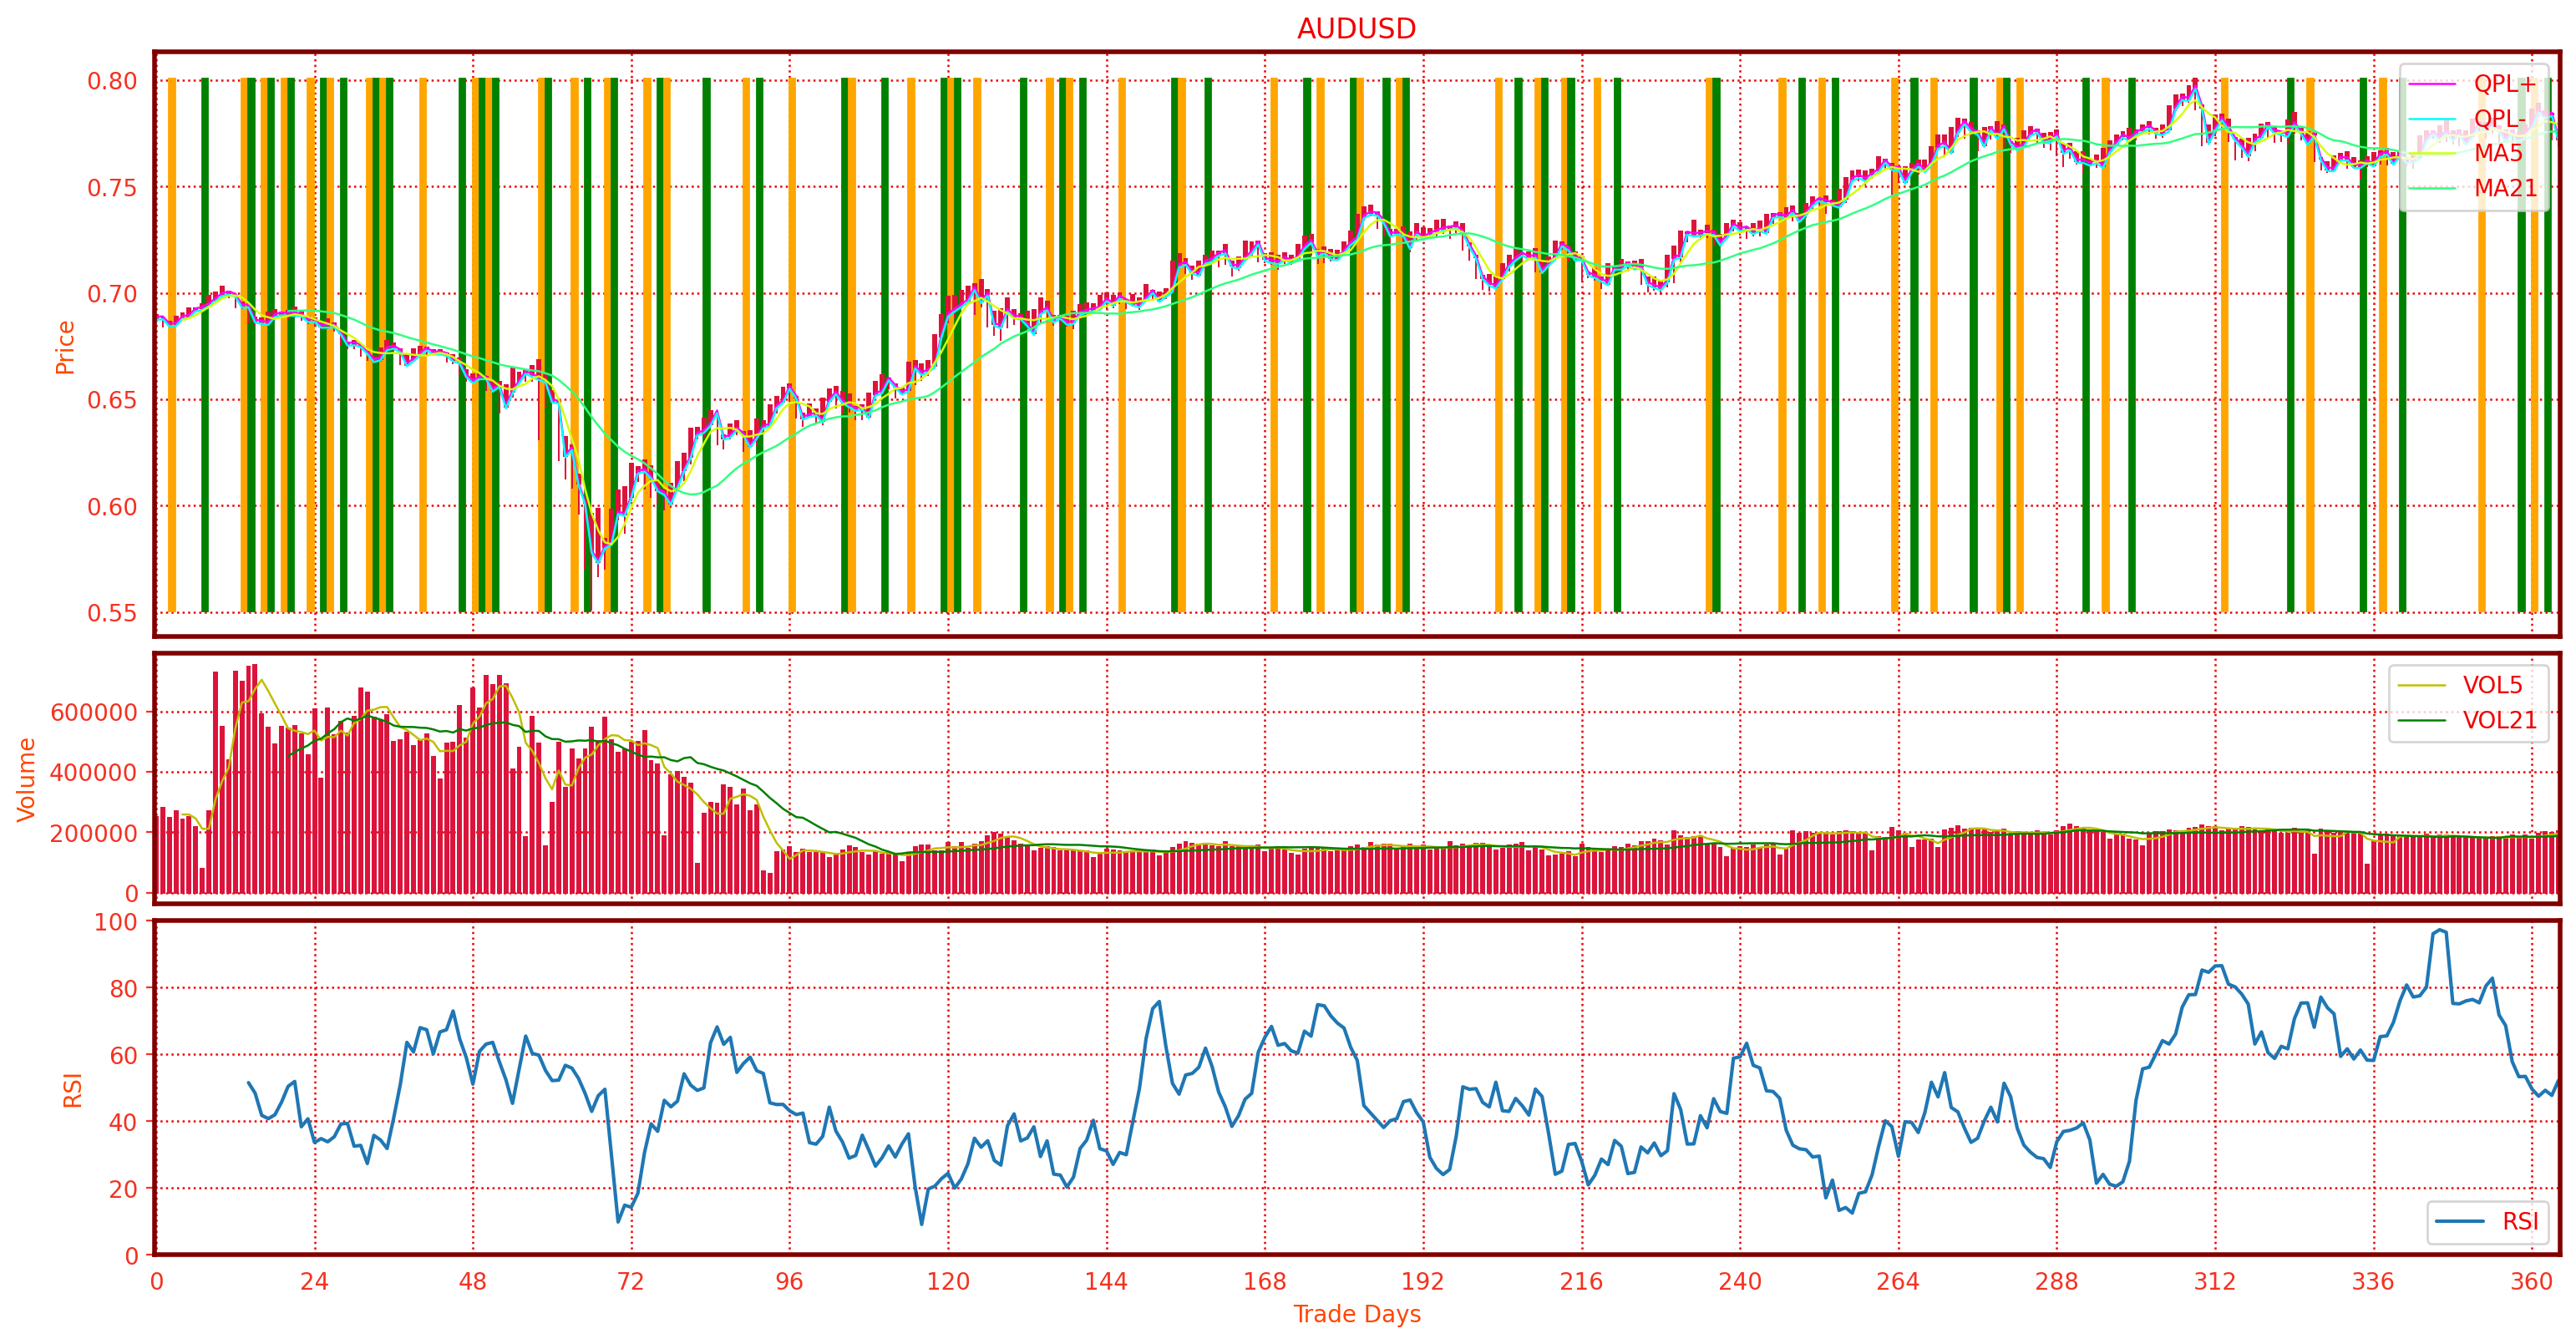

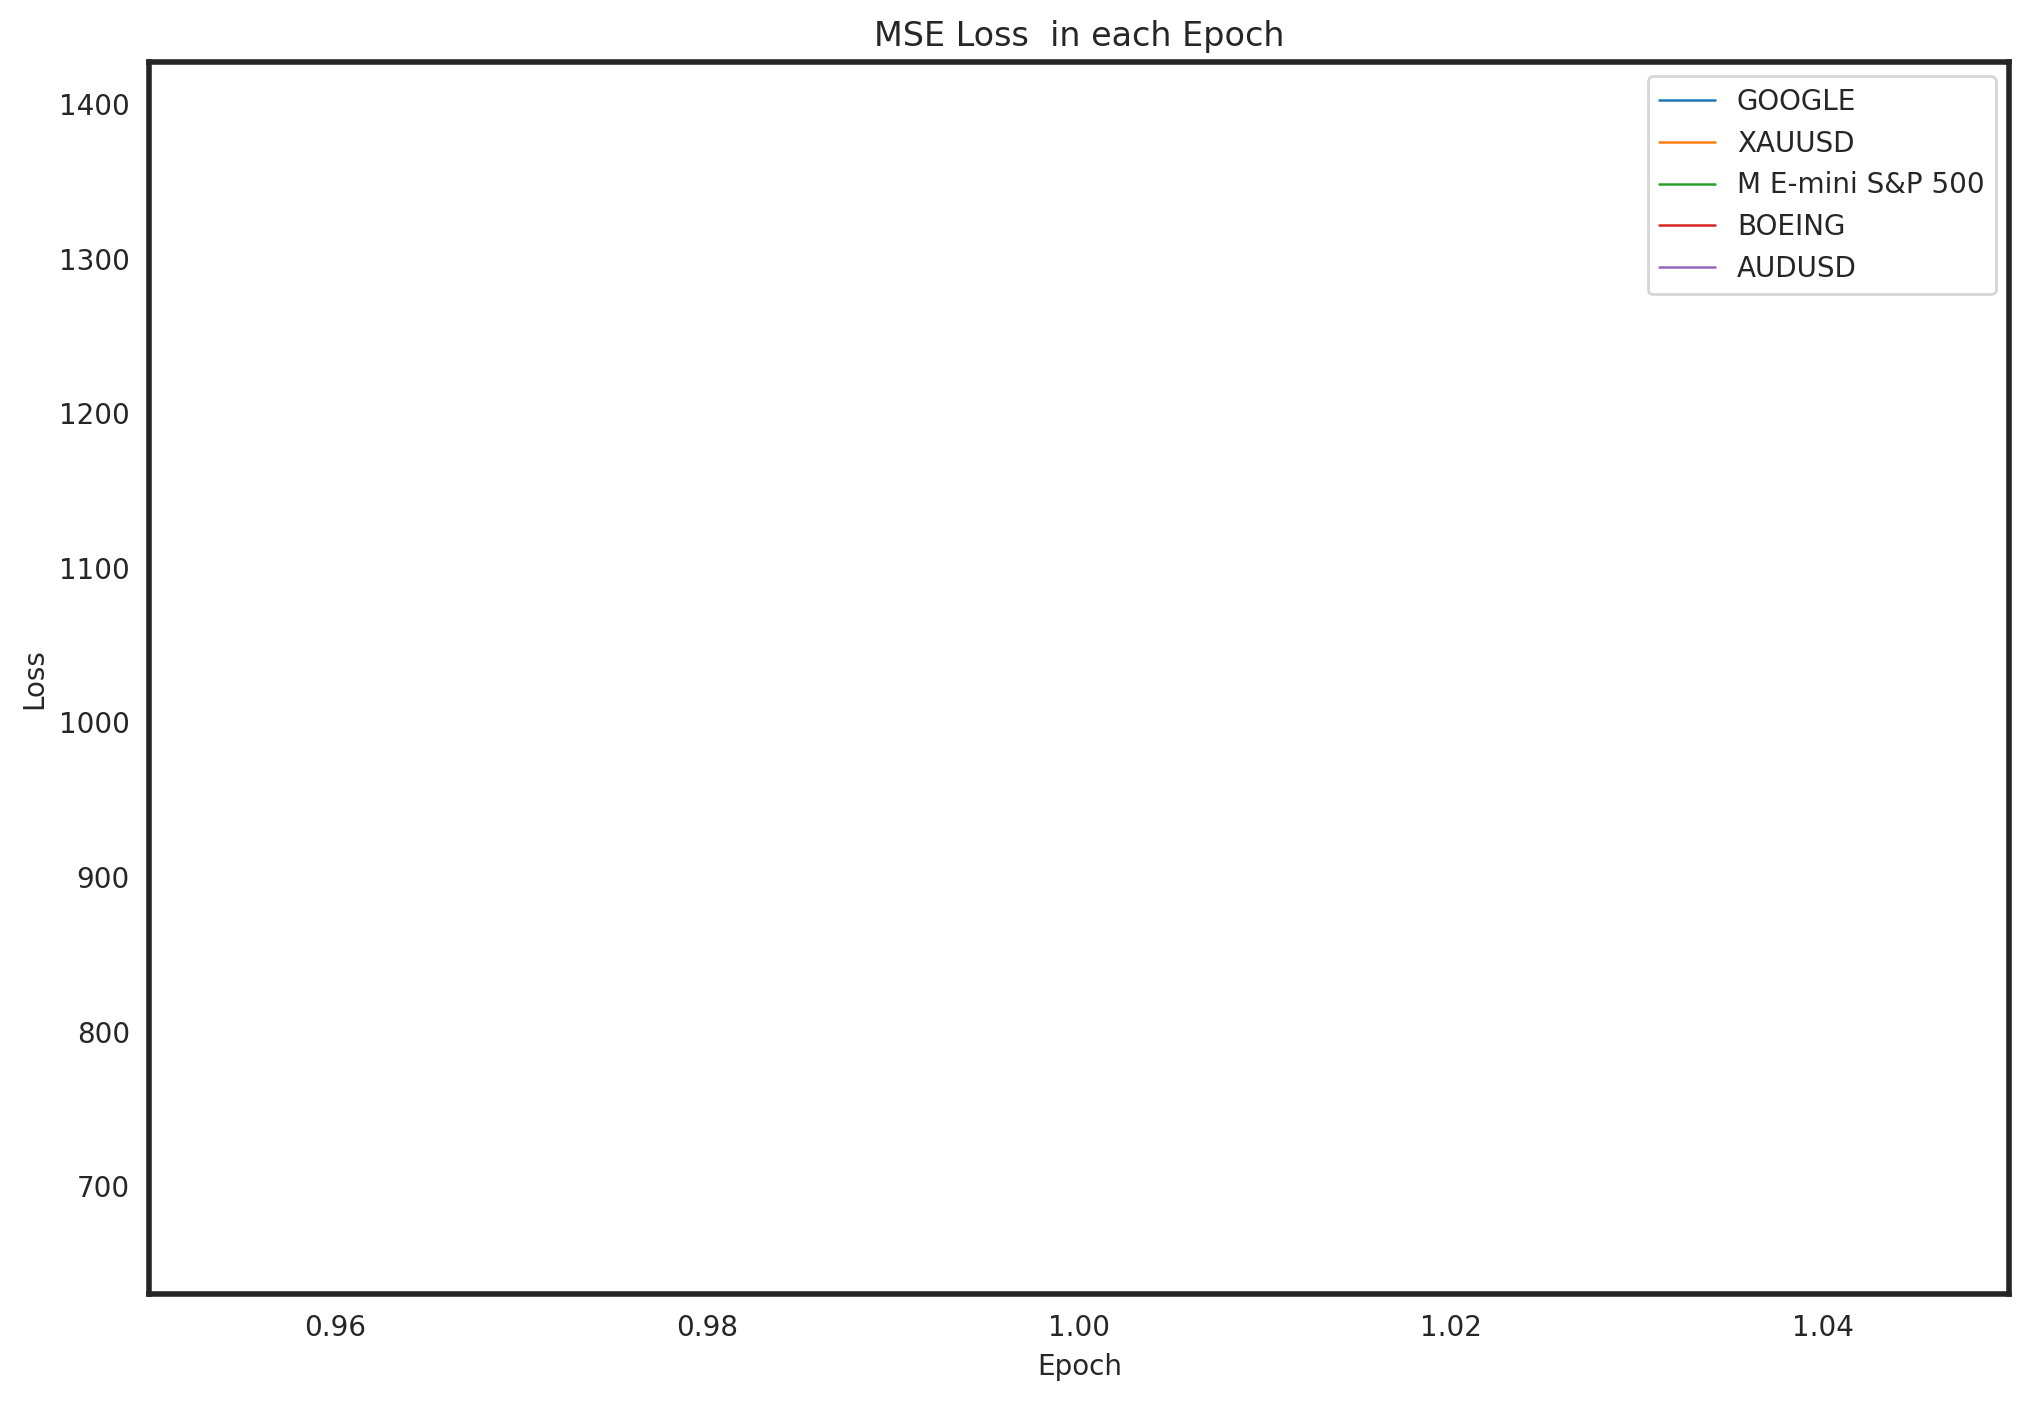

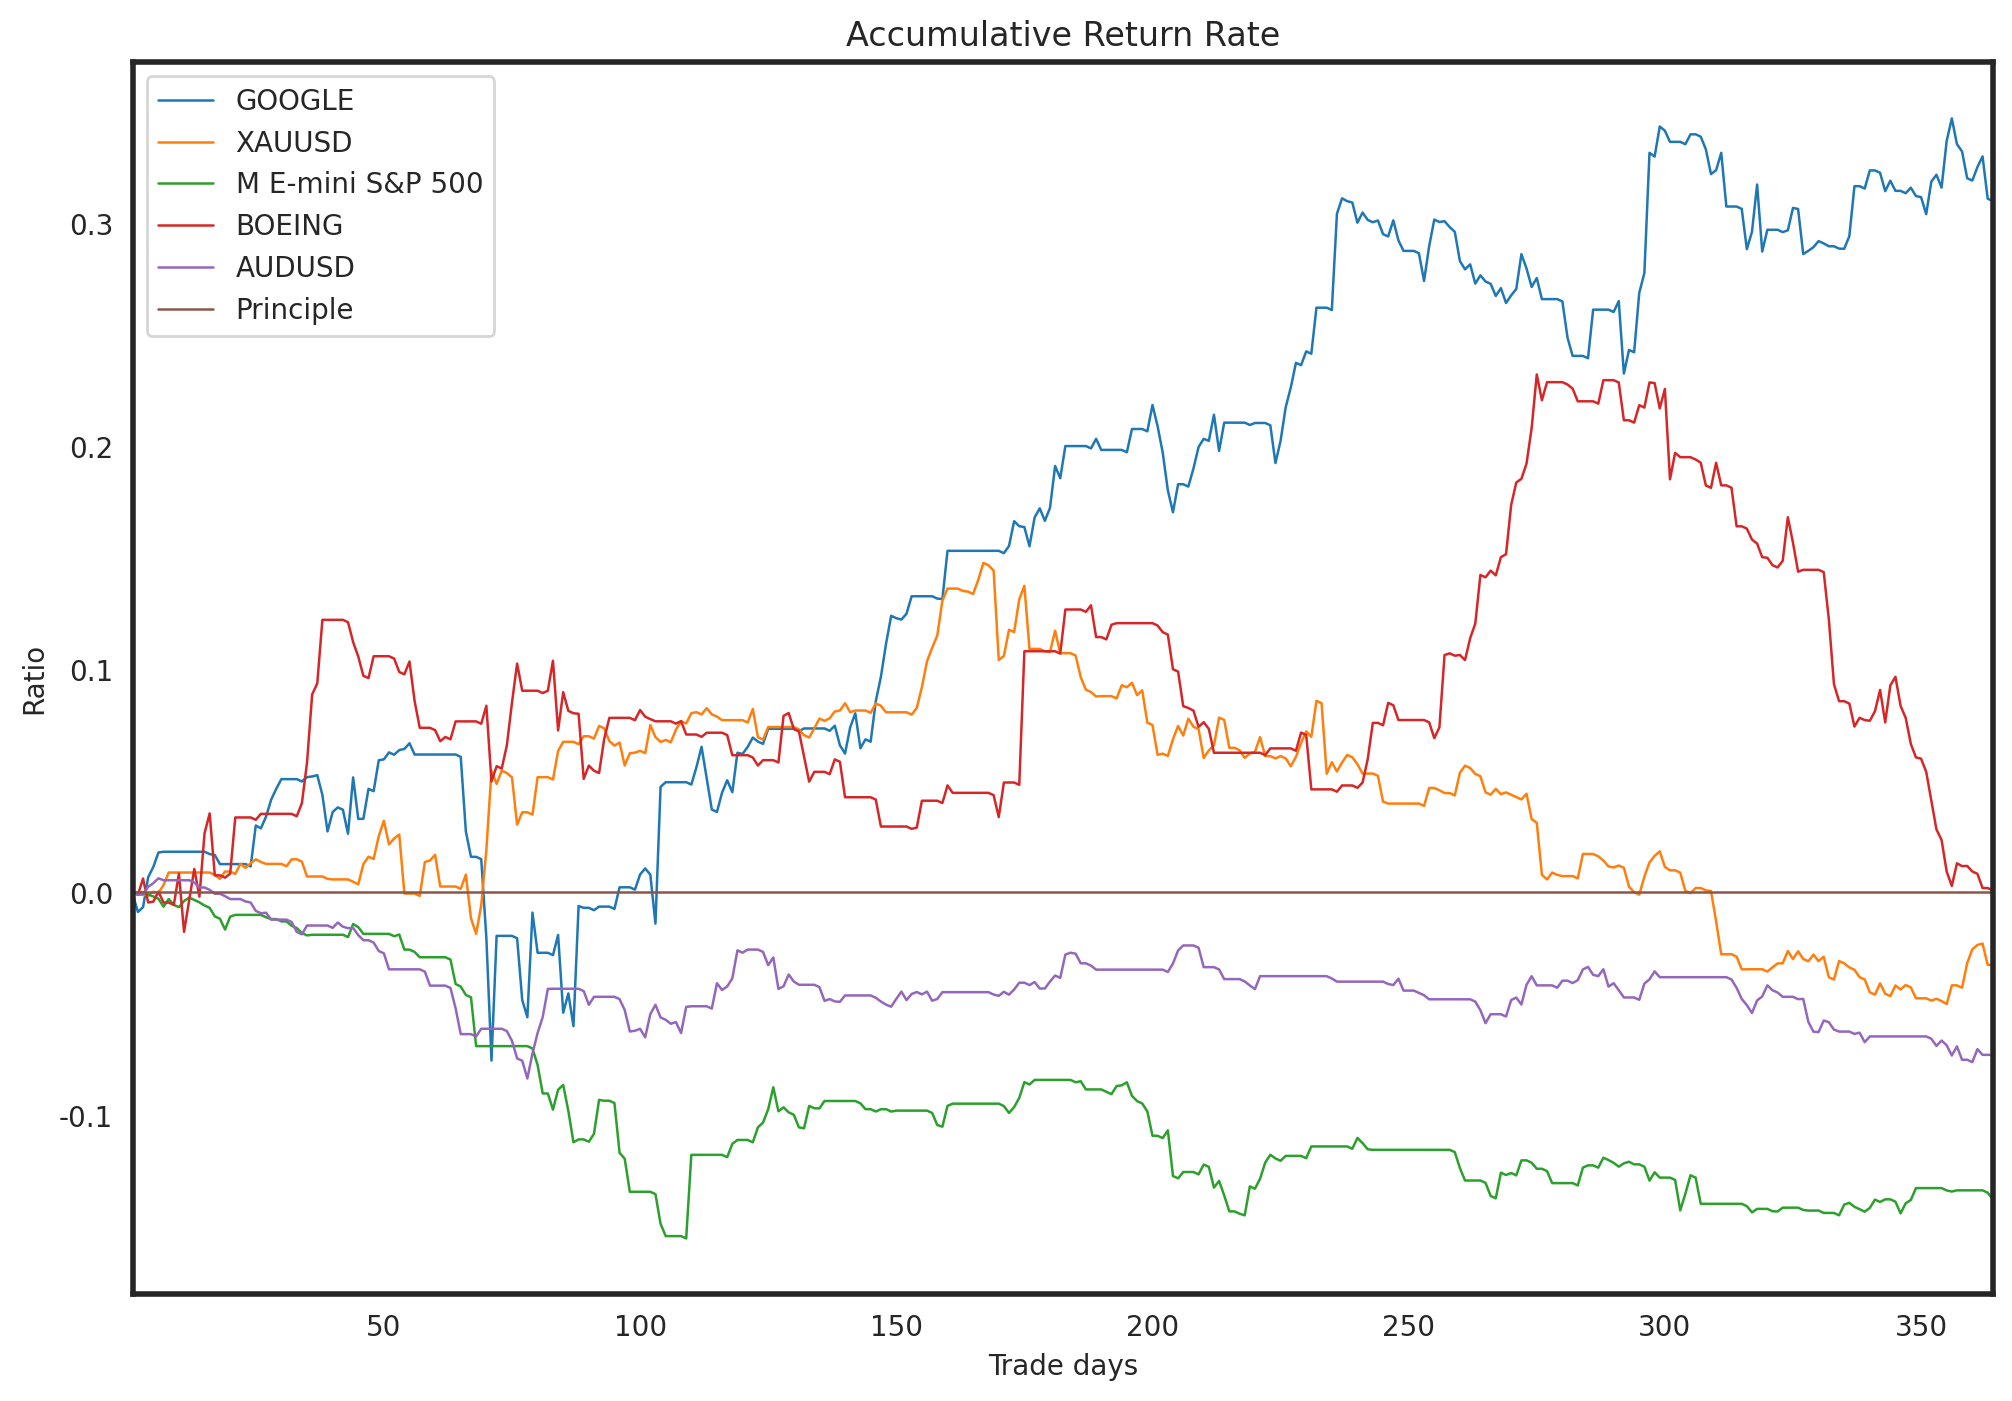

In [11]:

if __name__ == '__main__':
    # data = pd.read_csv("Data/test_data.csv")
    # data = pd.read_csv('Data/AUDUSD/source.csv')

    # Create file for recording index of strategy
    DIR = 'Results/index.txt'
    if os.path.exists(DIR):
        os.remove(DIR)
    g = open(DIR,'w')

    for product in Products:
        if product in ['AUDUSD','USDJPY', 'XAUUSD']:
            if_forex = True
        else:
            if_forex = False
        print("-------Training Model for %s --------" %product)
        data = pd.read_csv('/content/Quantum-Applied-Reinforcement-Learning-in-Finance/Data/'+product+'/source.csv')[base].iloc[::-1].reset_index().iloc[:,1::]
        data = Preprocessor(data).get_preprocessed_data()
        # print(data)
        INPUT_DIMS = [len(data.columns) + 3]

        env = Environment(data)
        GAMMA,BATCH_SIZE,LR = GAMMAs[Products.index(product)],BATCH_SIZEs[Products.index(product)],LRs[Products.index(product)]

        agent = Agent(GAMMA, EPSILON, LR, INPUT_DIMS, BATCH_SIZE, num_actions=N_ACTIONS,
                 min_exploration_rate=EPS_END,
                      first_layer_dimensions=fc1_dims,
                      second_layer_dimensions=fc2_dims
                      , third_layer_dimensions=fc3_dims)

        loss_history = []

        best_profit = -1e7
        best_log = 'Results/log/best_log_' + product + '.txt'
        best_balances = []
        for i in range(NGAMES):

            flag = True
            balances = []

            tmp_log = 'Results/log/tmp_log_' + product + '.txt'
            if os.path.exists(tmp_log):
                os.remove(tmp_log )
            file = open(tmp_log, 'w')

            done = False
            observation = env.reset()
            while not done:
                action = agent.choose_action(observation)
                observation_, reward, done = env.step(action,file,write = flag)
                if flag:
                    balances.append(env.balance)
                agent.store_transition(observation, action, reward, observation_, done)
                agent.learn()
                observation = observation_

            loss_history.append(agent.loss)

            print('episode', i, ': profits %.2f' % env.total_profit,'MSE loss %.2f' % agent.loss)

            file.close()

            if env.total_profit >= best_profit: #if it is the best result ever
                shutil.copy(tmp_log, best_log)
                best_balances = balances
                best_profit = env.total_profit

        os.remove(tmp_log) #delete the temp log file

        g.write(product+":\n")
        g.write("The Total Profit is %.2f \n" % best_profit)
        g.write("The Accumulative Return Rate is the last trade day is %.2f" % (100* ((best_balances[-1] - 1e7) / 1e7)) + '% \n')
        g.write("The Maximum Return Rate is  is %.2f" % (100 * ((max(best_balances) - 1e7) / 1e7)) + '% \n')
        g.write("The Minimum Return Rate is  is %.2f" % (100 * ((min(best_balances) - 1e7) / 1e7)) + '% \n')
        # g.write("The Max Draw Down rate for %s is %.2f " %(product, 100*MaxDrawdown(best_balances)) + '% \n')
        # g.write("The Sharpe Ratio is %.2f " % (100*SharpeRatio(best_balances)) + '% \n')
        g.write('\n')

        #Plot each Transaction on the Kline
        draw_transaction(product)

        #store into dictionary
        dic[product].append(loss_history)
        dic[product].append(best_balances)

    g.close()

    #Reset ploting
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set_style("white")
    x = [i + 1 for i in range(NGAMES)]

    # Plot loss curve
    plt.figure(figsize=[12, 8], dpi=200)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('MSE Loss  in each Epoch')
    for product in Products:
        plt.plot(x, dic[product][0], label=product)
    plt.legend(loc='upper right')
    plt.savefig('Results/graph/loss_curve.png', dpi=200)

    # Plot balance curve for last round
    x = [i + 1 for i in range(len(data)-1)]
    y = [0 for i in range(len(x))]
    plt.figure(figsize=[12, 8], dpi=200)
    plt.xlabel('Trade days')
    plt.ylabel('Ratio')
    plt.title('Accumulative Return Rate')
    for product in Products:
        plt.plot(x, [(i-1e7)/1e7 for i in dic[product][1]], label=product)
    plt.plot(x,y,label='Principle')
    plt.legend(loc='upper left')
    plt.savefig('Results/graph/balance_curve.png', dpi=200)

In [12]:
import os
import zipfile

def zip_folder(folder_path):
    # Get the base name of the folder
    base_name = os.path.basename(folder_path)

    # Create a zip file with the same name as the folder
    zip_file_path = f"{base_name}.zip"
    with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through each file and subfolder in the folder
        for root, _, files in os.walk(folder_path):
            for file in files:
                # Get the full path of the file
                file_path = os.path.join(root, file)
                # Add the file to the zip file, using relative path
                zipf.write(file_path, os.path.relpath(file_path, folder_path))

    return zip_file_path

# Example usage:
folder_path = "/content/Quantum-Applied-Reinforcement-Learning-in-Finance"
zip_path = zip_folder(folder_path)
print(f"Folder '{folder_path}' converted to '{zip_path}'")

Folder '/content/Quantum-Applied-Reinforcement-Learning-in-Finance' converted to 'Quantum-Applied-Reinforcement-Learning-in-Finance.zip'


In [13]:
# prompt: save the model

torch.save(agent.Q_network.state_dict(), "model.pt")